# Red Wine Quality - Exploratory Data Analysis

### Table of Contents 
(the links doesn't work on GitHub)

* [1. Load & explore data](#P01)
    * [Check the columns names & types](#P012)
    * [Check the range of values](#P013)
    * [Check the missing values](#P014)
    * [Check the target variable](#P015)
* [2. Feature selection](#P02)
    * [Density plots](#P021)
    * [Boxplots](#P022)
    * [Correlation matrix](#P023)
    * [Select columns](#P024)
* [3. Split the dataset](#P03)
* [4. Try various *classification* models](#P04)
    * [Logistic Regression](#P04_logistic_regression)
    * [Decision Tree](#P04_decision_tree)
        * [Search best max_depth](#P04_decision_tree_max_d)
        * [Search best min_samples_leaf](#P04_decision_tree_min_samples_leaf)
    * [Random Forest](#P04_random_forest)
        * [Search best n_estimators](#P04_random_forest_n_estimators)
        * [Search best max_depth](#P04_random_forest_max_d)
    * [XGBoost](#P04_xgboost)
        * [Search best eta](#P04_xgboost_eta)
        * [Search best max_depth](#P04_xgboost_max_depth)
        * [Search best min_child_weight](#P04_xgboost_min_child_weight)
    * [Model selection](#P04_result)
* [5. Export the selected model](#P05)
    * [Train the model](#P05_train)
    * [Export the model](#P05_export)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm, notebook

# 1. Load & explore data <a class="anchor" id="P01"></a>

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';', decimal='.')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Rename the columns <a class="anchor" id="P011"></a>

In [3]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

### Check the columns names & types <a class="anchor" id="P012"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check the ranges of values <a class="anchor" id="P013"></a>

In [5]:
data.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check the missing values <a class="anchor" id="P014"></a>

In [6]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **----- Comment -----**
> There is no missing values, so we don't need to handle it this time.

### Check the target variable <a class="anchor" id="P015"></a>

In [7]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

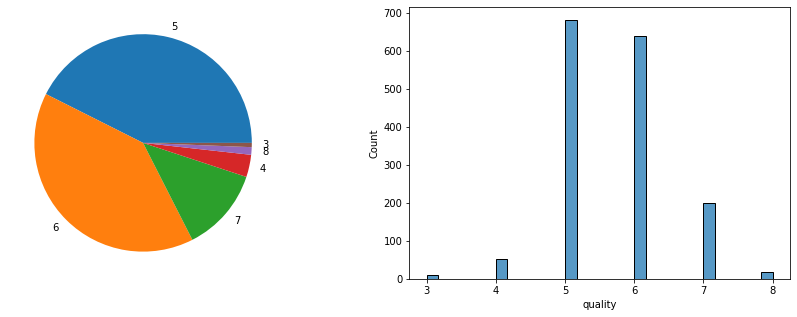

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,2)
sns.histplot(data['quality'])

plt.subplot(1,2,1)
check = data['quality'].value_counts()
plt.pie(list(check), labels=check.keys())

plt.show()
check

### **----- Comment -----**
> The dataset is imbalanced toward the middle scores (5,6)... So we will need to use an appropriate metric.
>
> However there is no longtail to consider as the values are restricted to 10

# 2. Feature selection <a class="anchor" id="P02"></a>

### Density plots <a class="anchor" id="P021"></a>

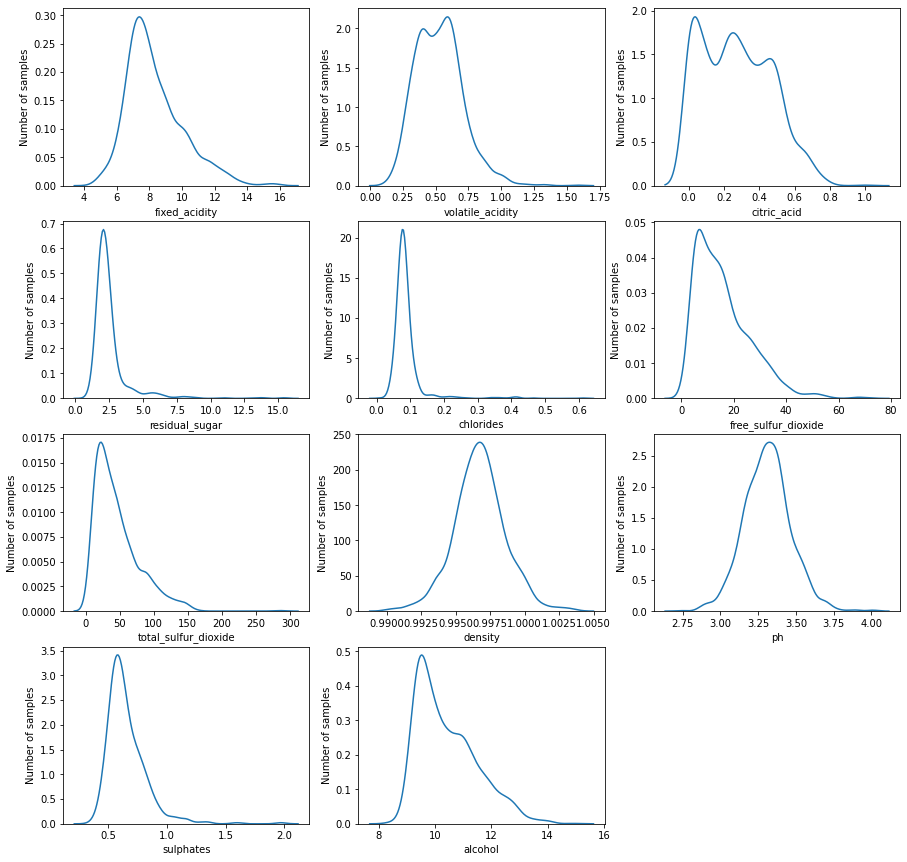

In [9]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    #plt.hist(data[c], bins=50, alpha=.75)
    #plt.plot(data[c])
    sns.kdeplot(data[c])
    plt.ylabel("Number of samples")
    plt.xlabel(c)

plt.show()

### Boxplots <a class="anchor" id="P022"></a>

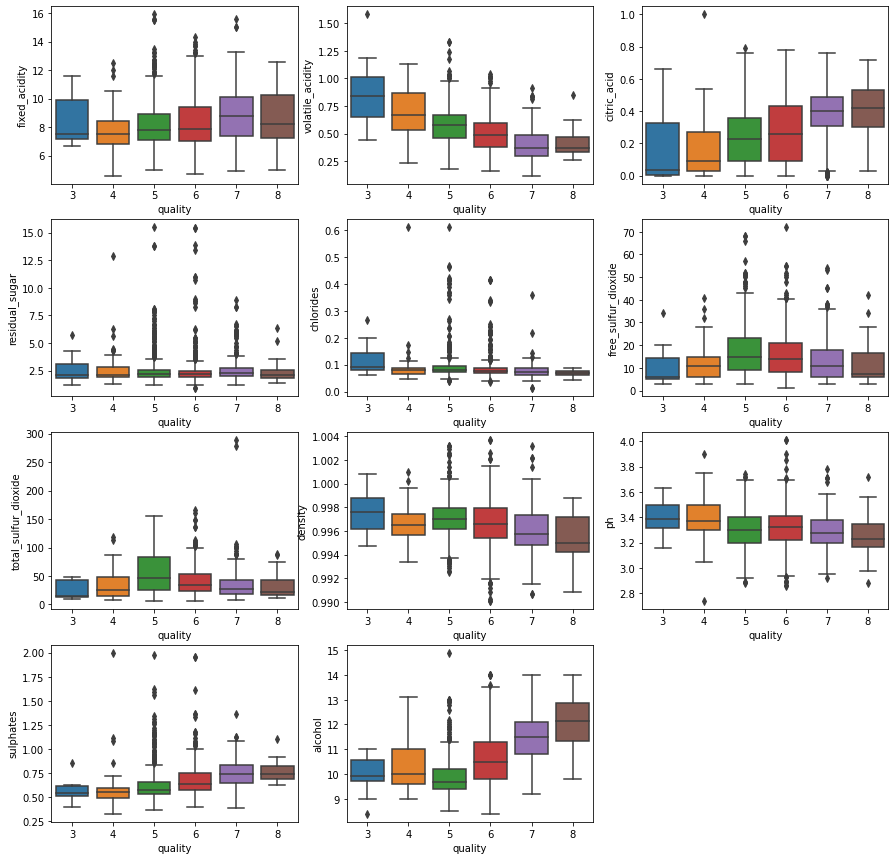

In [10]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality', y=c, notch=False, data=data)
    plt.ylabel(c)
    plt.xlabel('quality')

plt.show()

### **----- Comment -----**

> `volatile_acidity`, `density` and maybe `pH` seems negatively correlated.
>
> `citric_acid`, `alcohol`, `sulphates` and maybe `fixed_acicity` seems positively correlated.
>
> Let's confirm this with a correlation matrix.

### Correlation Matrix <a class="anchor" id="P023"></a>

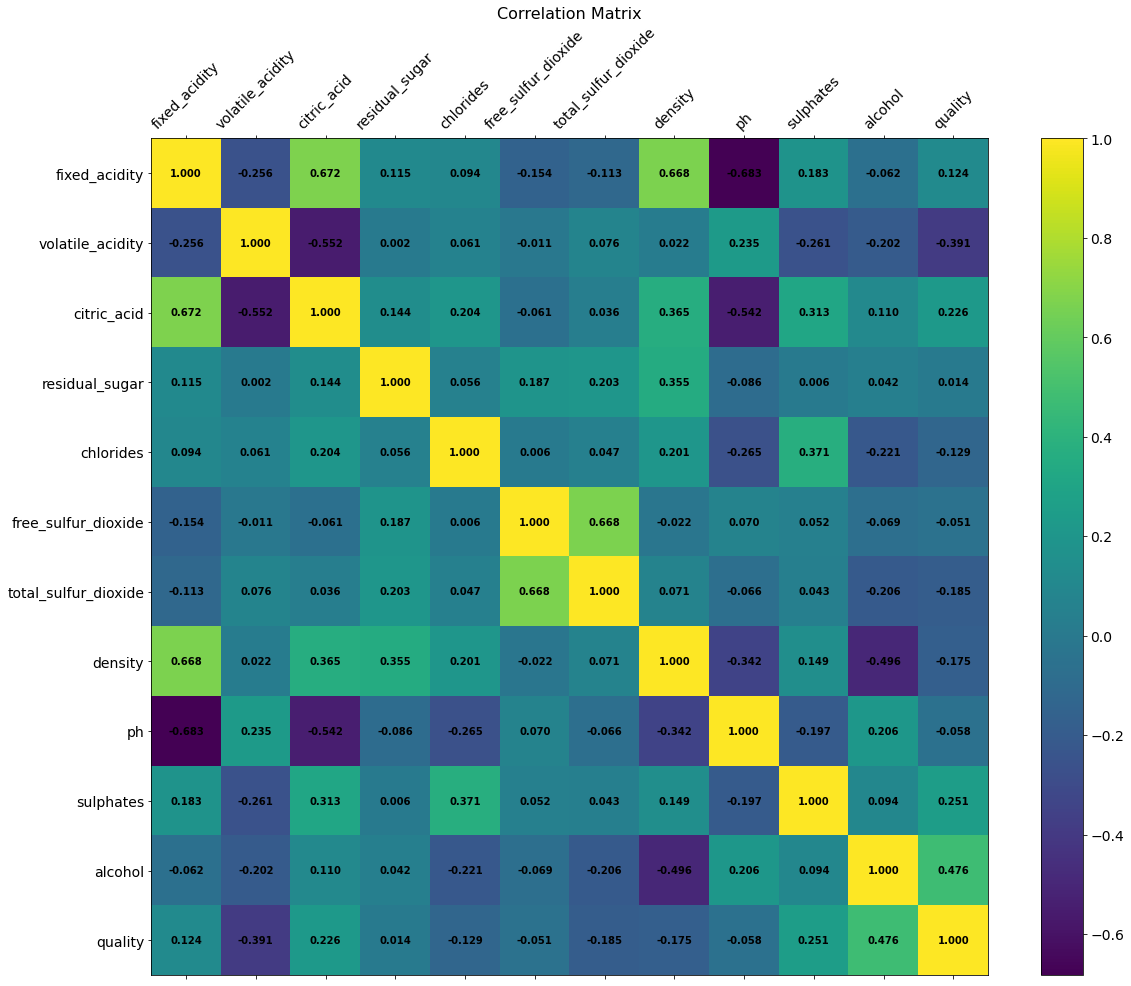

In [11]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

for (i, j), z in np.ndenumerate(data.corr()):
    plt.text(j, i, f"{z:0.3f}", ha='center', va='center', fontweight='demibold')

plt.title('Correlation Matrix', fontsize=16);

In [12]:
selection = data.corrwith(data['quality']).agg('abs').sort_values(ascending=False)
selection

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
ph                      0.057731
free_sulfur_dioxide     0.050656
residual_sugar          0.013732
dtype: float64

### Select columns with correlation > 0.1 <a class="anchor" id="P024"></a>

In [13]:
selected_columns = selection.index[selection > 0.15]
#selected_columns = selected_columns.drop(['quality'])
selected_columns

Index(['quality', 'alcohol', 'volatile_acidity', 'sulphates', 'citric_acid',
       'total_sulfur_dioxide', 'density'],
      dtype='object')

In [14]:
df = data[selected_columns]
df.head(5)

,quality,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,5,9.4,0.70,0.56,0.00,34.0,0.9978
1,5,9.8,0.88,0.68,0.00,67.0,0.9968
2,5,9.8,0.76,0.65,0.04,54.0,0.9970
3,6,9.8,0.28,0.58,0.56,60.0,0.9980
4,5,9.4,0.70,0.56,0.00,34.0,0.9978


# 3. Split the dataset <a class="anchor" id="P03"></a>

### Split the predictors and the target 

In [15]:
y_full = df['quality']
y_full.head(2)

0    5
1    5
Name: quality, dtype: int64

In [16]:
dt_full = df.copy()
dt_full = dt_full.drop(columns='quality')
dt_full.head(2)

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,9.4,0.70,0.56,0.0,34.0,0.9978
1,9.8,0.88,0.68,0.0,67.0,0.9968


### Create train, validation, test (& full_train) splits

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dt_train_full, dt_test, y_train_full, y_test = train_test_split(dt_full, y_full, test_size=0.2, random_state=42)
dt_train, dt_valid, y_train, y_valid = train_test_split(dt_train_full, y_train_full, test_size=dt_test.shape[0], random_state=42)

In [19]:
assert(dt_valid.shape[0] == dt_test.shape[0])

In [20]:
assert(dt_full.shape[0] == dt_train.shape[0] + dt_valid.shape[0] + dt_test.shape[0])

# 4. Try various *classification* models <a class="anchor" id="P04"></a>

In [21]:
X_train = dt_train.values
X_valid = dt_valid.values
X_test = dt_test.values

In [22]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

def evaluate_classification(y_true, y_pred, y_pred_proba, multi_class='ovr', verbose=1):
    roc = roc_auc_score(y_true, y_pred_proba, multi_class=multi_class)
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=False)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=False)
    if verbose > 0:
        print(f"ROCAUC:{roc:6.3f} | F1:{f1:6.3f} (precision:{precision:6.3f} & recall:{recall:6.3f}) | Accuracy:{accuracy:6.3f}")
    return roc, f1

## Logistic Regression  <a class="anchor" id="P04_logistic_regression"></a>

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logistic_model = LogisticRegression(n_jobs=-1).fit(X_train, y_train)

In [25]:
y_pred = logistic_model.predict(X_valid)
y_pred_proba = logistic_model.predict_proba(X_valid)

In [26]:
_, _ = evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.644 | F1: 0.525 (precision: 0.488 & recall: 0.572) | Accuracy: 0.572


### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a basic **Logistic Regression** appears to be around `0.644`
---

## Decision Tree (regression) <a class="anchor" id="P04_decision_tree"></a>

In [27]:
from sklearn.tree import DecisionTreeClassifier

### Train a basic model

In [28]:
dtree_model = DecisionTreeClassifier(random_state=1)

In [29]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [30]:
y_pred = dtree_model.predict(X_valid)
y_pred_proba = dtree_model.predict_proba(X_valid)

In [31]:
_, _ = evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.632 | F1: 0.602 (precision: 0.615 & recall: 0.603) | Accuracy: 0.603


### **----- TMP RESULT -----**

> The best `ROC AUC score` for the ***default* Decision Tree** appears to be around `0.632`
---

### Search best `max_depth`  <a class="anchor" id="P04_decision_tree_max_d"></a>

In [32]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeClassifier(max_depth=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    y_pred_proba = dtree_model.predict_proba(X_valid)
    print(f"max_depth:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba)

  0%|          | 0/13 [00:00<?, ?it/s]

max_depth:  1  =>  ROCAUC: 0.665 | F1: 0.522 (precision: 0.478 & recall: 0.581) | Accuracy: 0.581
max_depth:  2  =>  ROCAUC: 0.667 | F1: 0.522 (precision: 0.478 & recall: 0.581) | Accuracy: 0.581
max_depth:  3  =>  ROCAUC: 0.735 | F1: 0.524 (precision: 0.542 & recall: 0.541) | Accuracy: 0.541
max_depth:  4  =>  ROCAUC: 0.748 | F1: 0.588 (precision: 0.572 & recall: 0.613) | Accuracy: 0.613
max_depth:  5  =>  ROCAUC: 0.765 | F1: 0.555 (precision: 0.545 & recall: 0.575) | Accuracy: 0.575
max_depth:  6  =>  ROCAUC: 0.736 | F1: 0.543 (precision: 0.543 & recall: 0.559) | Accuracy: 0.559
max_depth:  7  =>  ROCAUC: 0.749 | F1: 0.595 (precision: 0.600 & recall: 0.603) | Accuracy: 0.603
max_depth:  8  =>  ROCAUC: 0.622 | F1: 0.596 (precision: 0.591 & recall: 0.606) | Accuracy: 0.606
max_depth:  9  =>  ROCAUC: 0.624 | F1: 0.577 (precision: 0.578 & recall: 0.584) | Accuracy: 0.584
max_depth: 10  =>  ROCAUC: 0.621 | F1: 0.591 (precision: 0.597 & recall: 0.594) | Accuracy: 0.594
max_depth: 15  =>  R

Text(0.5, 0, 'max_depth')

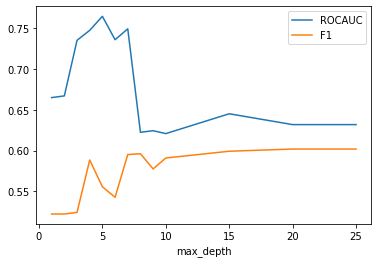

In [33]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("max_depth")

### **----- TMP RESULT -----**

> The best `ROC AUC score` for a Decision Tree appears to be around `0.765` with `max_depth=5`
---

### Search best `min_samples_leaf`  <a class="anchor" id="P04_decision_tree_min_samples_leaf"></a>

In [34]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
max_d = 5

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeClassifier(max_depth=max_d, min_samples_leaf=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    y_pred_proba = dtree_model.predict_proba(X_valid)
    print(f"min_samples_leaf:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba)

  0%|          | 0/13 [00:00<?, ?it/s]

min_samples_leaf:  1  =>  ROCAUC: 0.765 | F1: 0.555 (precision: 0.545 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  2  =>  ROCAUC: 0.766 | F1: 0.556 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  3  =>  ROCAUC: 0.767 | F1: 0.561 (precision: 0.552 & recall: 0.581) | Accuracy: 0.581
min_samples_leaf:  4  =>  ROCAUC: 0.766 | F1: 0.560 (precision: 0.550 & recall: 0.581) | Accuracy: 0.581
min_samples_leaf:  5  =>  ROCAUC: 0.779 | F1: 0.549 (precision: 0.541 & recall: 0.569) | Accuracy: 0.569
min_samples_leaf:  6  =>  ROCAUC: 0.780 | F1: 0.549 (precision: 0.541 & recall: 0.569) | Accuracy: 0.569
min_samples_leaf:  7  =>  ROCAUC: 0.787 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  8  =>  ROCAUC: 0.787 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf:  9  =>  ROCAUC: 0.786 | F1: 0.555 (precision: 0.548 & recall: 0.575) | Accuracy: 0.575
min_samples_leaf: 10  =>  ROCAUC: 0.784 | F1: 0.555 (pr

Text(0.5, 0, 'min_samples_leaf')

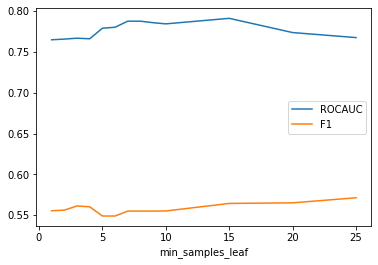

In [35]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("min_samples_leaf")

### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a **Decision Tree** appears to be around `0.791` with `max_depth=5` and `min_samples_leaf=15`
>
> That doesn't seem promising, so we will stop here for now and see other methods.
---

## Random forest (regression) <a class="anchor" id="P04_random_forest"></a>

In [36]:
from sklearn.ensemble import RandomForestClassifier

### Train a basic model

In [37]:
rforest_model = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

In [38]:
rforest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [39]:
y_pred = rforest_model.predict(X_valid)
y_pred_proba = rforest_model.predict_proba(X_valid)

In [40]:
_, _ = evaluate_classification(y_valid, y_pred, y_pred_proba)

ROCAUC: 0.724 | F1: 0.632 (precision: 0.624 & recall: 0.647) | Accuracy: 0.647


### **----- TMP RESULT -----**

> The best `ROC AUC score` for the ***default* Random Forest** appears to be around `0.724`
---

### Search best `n_estimators`  <a class="anchor" id="P04_random_forest_n_estimators"></a>

In [41]:
scores = {}
values = np.linspace(10,600,60)

for v in notebook.tqdm(values):
    rforest_model = RandomForestClassifier(n_estimators=int(v), random_state=1, n_jobs=-1)
    rforest_model.fit(X_train, y_train)
    y_pred = rforest_model.predict(X_valid)
    y_pred_proba = rforest_model.predict_proba(X_valid)
    # print(f"n_estimators:{int(v):4}  =>  ", end="")
    scores[int(v)] = evaluate_classification(y_valid, y_pred, y_pred_proba, verbose=0)

  0%|          | 0/60 [00:00<?, ?it/s]

Text(0.5, 0, 'n_estimators')

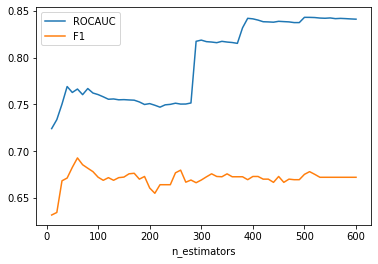

In [42]:
plt.plot(scores.keys(), scores.values(), label=['ROCAUC','F1'])
plt.legend()
plt.xlabel("n_estimators")

In [43]:
keys = pd.Series([k for k,v in scores.items()])
rocauc = pd.Series([v[0] for k,v in scores.items()])
f1 = pd.Series([v[1] for k,v in scores.items()])

print(f"max ROCAUC:{rocauc.max():.3f}  =>  n_estimators:{keys[rocauc.idxmax()]:3}")

max ROCAUC:0.843  =>  n_estimators:500


### **----- TMP RESULT -----**

> The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500`
---

### Search best `max_depth` / `n_estimators` combination <a class="anchor" id="P04_random_forest_max_d"></a>

In [44]:
scores = {'rocauc':{}, 'f1':{}}

for max_d in notebook.tqdm([10,15,20,25]):
    
    scores['rocauc'][max_d] = {}
    scores['f1'][max_d] = {}
    
    for ne in notebook.tqdm(np.linspace(10,600,60)):
        
        rforest_model = RandomForestClassifier(n_estimators=int(ne), random_state=1, n_jobs=-1, max_depth=max_d)
        rforest_model.fit(X_train, y_train)
        y_pred = rforest_model.predict(X_valid)
        y_pred_proba = rforest_model.predict_proba(X_valid)

        # tqdm.write(f"max_d:{max_d:3} - n_estimators:{int(ne):4}  =>  ", end="")
        rocauc, f1 = evaluate_classification(y_valid, y_pred, y_pred_proba, verbose=0)
        scores['rocauc'][max_d][int(ne)] = rocauc
        scores['f1'][max_d][int(ne)] = f1

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

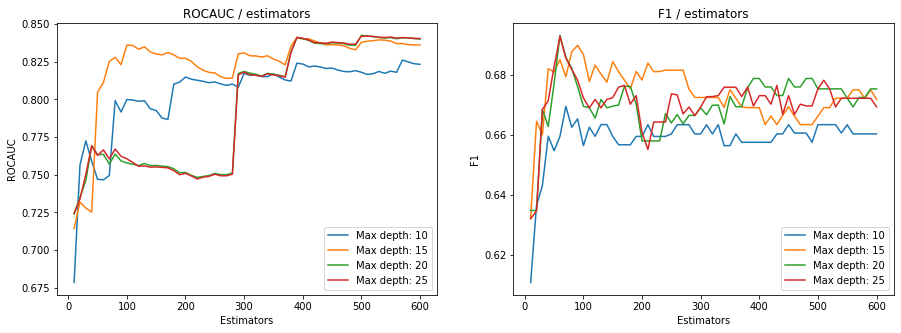

In [45]:
fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
for k,v in scores['rocauc'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("ROCAUC")
plt.title("ROCAUC / estimators")
plt.legend()

plt.subplot(1,2,2)
for k,v in scores['f1'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("F1")
plt.title("F1 / estimators")
plt.legend()


plt.show()

In [46]:
for i, v in scores['rocauc'].items():
    print(f"max_depth:{i:3} - ", end="")
    z1 = pd.Series([w for j,w in v.items()])
    z2 = pd.Series([j for j,w in v.items()])
    print(f"n_estimators:{z2[z1.idxmax()]}  =>  max ROCAUC:{z1.max()}")

max_depth: 10 - n_estimators:570  =>  max ROCAUC:0.8261925219101518
max_depth: 15 - n_estimators:390  =>  max ROCAUC:0.8409477752290829
max_depth: 20 - n_estimators:500  =>  max ROCAUC:0.8426152469905585
max_depth: 25 - n_estimators:510  =>  max ROCAUC:0.8420490742702476


### **----- FINAL RESULT -----**

> The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500` and `max_depth=20`
>
> That is interesting, be let see if we can do better with another method.
---

## XGboost (regression) <a class="anchor" id="P04_xgboost"></a>

In [47]:
import xgboost as xgb

### Progress Bar

In [48]:
class xgb_progress(xgb.callback.TrainingCallback):
    """ Custom class used to create tqdm callbacks with XGBoost
        example: xgb_progressbar = xgb_progress(num_rounds)
                 xgb.train( ... , callbacks=[xgb_progressbar])
    """
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.pbar = notebook.tqdm(total=rounds)
        
    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)

### Create DMatrix for train and validation

In [49]:
features = dt_full.columns
df_train_xgb = xgb.DMatrix(X_train, label=y_train, feature_names=features)
df_valid_xgb = xgb.DMatrix(X_valid, label=y_valid, feature_names=features)

### Create a watchlist

In [50]:
watchlist = [(df_train_xgb, 'train'), (df_valid_xgb, 'val')]

### Train a basic model

In [51]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    #'objective': 'reg:squarederror', # <-- for regression 
    #'objective': 'binary:logistic', # <-- for binary classification
    'objective': 'multi:softmax', # <-- for multiclass classification
    'num_class': max(y_pred)+1, 
    #'eval_metric': 'auc',           # <-- for binary classification, default according to objective
    'eval_metric': 'mlogloss',
    'nthread': None,
    #'disable_default_eval_metric': 1,
    
    'seed': 1,
    'verbosity': 0,
}

num_rounds = 100
early_stop = 10

> The **ROCAUC isn't avaible in XGBoost** for multiclass classification...
> 
> So wi will use the default log-loss and then we will compute the ROCAUC on the predictions

In [52]:
xgb_progressbar = xgb_progress(num_rounds)

progress = dict()

xgb_model = xgb.train(
                        xgb_params, 
                        df_train_xgb, 
                        # feval=rocauc_multi,
                        num_boost_round=num_rounds, 
                        early_stopping_rounds=early_stop,
                        verbose_eval=0, 
                        evals=watchlist,
                        callbacks=[xgb_progressbar],
                        evals_result=progress,
                        )

  0%|          | 0/100 [00:00<?, ?it/s]

In [53]:
xgb_model.best_ntree_limit-1

15

In [54]:
progress['train']['mlogloss'][-5:]

[0.32015, 0.305137, 0.298411, 0.291747, 0.280725]

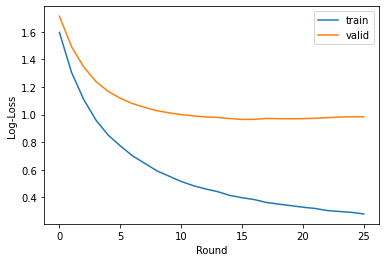

In [55]:
plt.plot(progress['train']['mlogloss'], label='train')
plt.plot(progress['val']['mlogloss'], label='valid')

plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

### Search best `eta`  <a class="anchor" id="P04_xgboost_eta"></a>

In [56]:
xgb_progressbar = xgb_progress(num_rounds*3)

scores = {}

for eta_v in [0.01, 0.1, 0.3]:
    
    progress = dict()

    xgb_params['eta'] = eta_v

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\neta:{eta_v} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[eta_v] = progress['val']['mlogloss']

  0%|          | 0/300 [00:00<?, ?it/s]

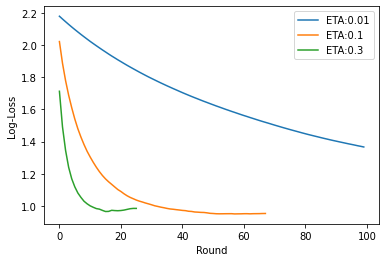

In [57]:
for k,v in scores.items():
    plt.plot(v, label=f"ETA:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

In [58]:
for k,v in scores.items():
    print(f"eta:{k:5} - min LogLoss:{min(v)}")

eta: 0.01 - min LogLoss:1.36609
eta:  0.1 - min LogLoss:0.949808
eta:  0.3 - min LogLoss:0.96476


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.949` with an `eta=0.1`
---

### Search best `max_depth`  <a class="anchor" id="P04_xgboost_max_depth"></a>

In [59]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.1

for max_d in values:
    
    progress = dict()

    xgb_params['max_depth'] = max_d

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\nmax_depth:{max_d} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[max_d] = progress['val']['mlogloss']

  0%|          | 0/1300 [00:00<?, ?it/s]

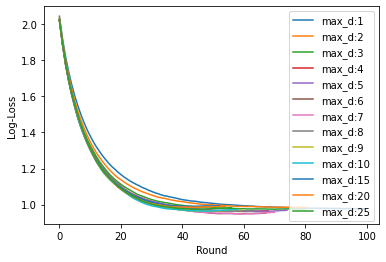

In [60]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

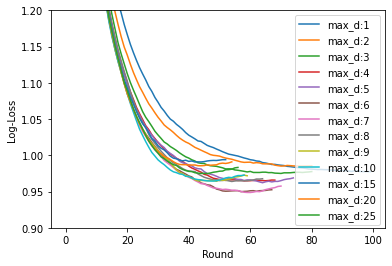

In [61]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.ylim(0.9,1.2)
plt.legend()

In [62]:
for k,v in scores.items():
    print(f"max_d:{k:2} - min LogLoss:{min(v)}")

max_d: 1 - min LogLoss:0.977372
max_d: 2 - min LogLoss:0.985138
max_d: 3 - min LogLoss:0.975004
max_d: 4 - min LogLoss:0.964742
max_d: 5 - min LogLoss:0.962189
max_d: 6 - min LogLoss:0.949808
max_d: 7 - min LogLoss:0.948695
max_d: 8 - min LogLoss:0.963921
max_d: 9 - min LogLoss:0.9642
max_d:10 - min LogLoss:0.964495
max_d:15 - min LogLoss:0.990815
max_d:20 - min LogLoss:0.985584
max_d:25 - min LogLoss:0.974769


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.948` with `eta=0.1` and `max_depth=7`
---

### Search best `min_child_weight`  <a class="anchor" id="P04_xgboost_min_child_weight"></a>

In [63]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.1
xgb_params['max_depth'] = 7

for min_c in values:
    
    progress = dict()

    xgb_params['min_child_weight'] = min_c

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\nmin_child_weight:{min_c} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[min_c] = progress['val']['mlogloss']

  0%|          | 0/1300 [00:00<?, ?it/s]

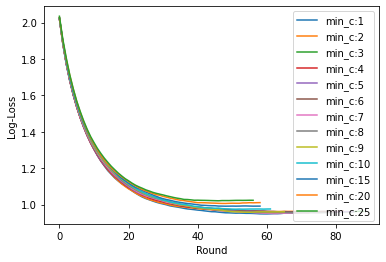

In [64]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.legend()

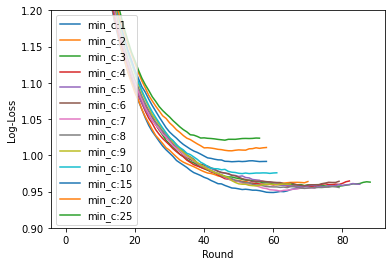

In [65]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("Log-Loss")
plt.ylim(0.9,1.2)
plt.legend()

In [66]:
for k,v in scores.items():
    print(f"min_child_weight:{k:2} - min Log-Loss:{min(v)}")

min_child_weight: 1 - min Log-Loss:0.948696
min_child_weight: 2 - min Log-Loss:0.961096
min_child_weight: 3 - min Log-Loss:0.957039
min_child_weight: 4 - min Log-Loss:0.956367
min_child_weight: 5 - min Log-Loss:0.956432
min_child_weight: 6 - min Log-Loss:0.957854
min_child_weight: 7 - min Log-Loss:0.950615
min_child_weight: 8 - min Log-Loss:0.954485
min_child_weight: 9 - min Log-Loss:0.958017
min_child_weight:10 - min Log-Loss:0.974796
min_child_weight:15 - min Log-Loss:0.991155
min_child_weight:20 - min Log-Loss:1.006229
min_child_weight:25 - min Log-Loss:1.020889


### **----- TMP RESULT -----**

> The best `Log-Loss` for a **XBoost Classification** appears to be around `0.948` with `eta=0.1`, `max_depth=7`, `min_child_weight=1` and a `best_ntree_limit=60`
---

### Evaluate with `ROC AUC score`  <a class="anchor" id="P04_xgboost_rocauc"></a>

In [67]:
xgb_model2 = xgb.XGBClassifier(n_estimators=num_rounds, learning_rate=0.1, max_depth=7, min_child_weight=1, objective='multi:softmax', num_class=max(y_pred)+1, random_state=1, eval_metric='mlogloss', verbose=0)

In [68]:
watchlist = [(dt_train_full, y_train_full), (dt_test, y_test)]

In [69]:
xgb_model2.fit(dt_train_full, y_train_full, eval_set=watchlist, early_stopping_rounds=early_stop, verbose=0)

/home/valkea/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=9, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [70]:
xgb_model2.best_ntree_limit-1

78

I evualute the model using the `test` set because the Validation is included in the `training_full` set.

In [71]:
y_pred = xgb_model2.predict(dt_test)
y_pred_proba = xgb_model2.predict_proba(dt_test)

In [72]:
_, _ = evaluate_classification(y_test, y_pred, y_pred_proba)

ROCAUC: 0.791 | F1: 0.642 (precision: 0.631 & recall: 0.656) | Accuracy: 0.656


### **----- FINAL XGBoost RESULT -----**

> The best `ROC AUC score` for a **XBoost Classification** appears to be around `0.791` *(on the test set)*
---

## Model results <a class="anchor" id="P04_result"></a>

* The best `ROC AUC score` for a basic **Logistic Regression** appears to be around `0.644`
* The best `ROC AUC score` for a **Decision Tree** appears to be around `0.791` with `max_depth=5` and `min_samples_leaf=15`
* The best `ROC AUC score` for a **Random Forest** appears to be around `0.843` with `n_estimarors=500` and `max_depth=20`
* The best `ROC AUC score` for a **XBoost Classification** appears to be around `0.791` *(on the test set)*

> The **Random Forest** model appears to be the best model at the moment *(but we could try more models and fine tune more parameters)*.

**Let's export the selected model**

# 5. Export the selected model <a class="anchor" id="P05"></a>

### Train a Random Forest model with the best parameters on the train_full dataset <a class="anchor" id="P05_train"></a>

In [81]:
rforest_model = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1, max_depth=20)
rforest_model.fit(dt_train_full.values, y_train_full.values)

y_pred = rforest_model.predict(dt_test.values)
y_pred_proba = rforest_model.predict_proba(dt_test.values)

_, _ = evaluate_classification(y_test, y_pred, y_pred_proba)

ROCAUC: 0.872 | F1: 0.644 (precision: 0.630 & recall: 0.662) | Accuracy: 0.662


### Save the model <a class="anchor" id="P05_export"></a>

In [82]:
import pickle

In [83]:
with open('model_classification.bin', 'wb') as f_out:
    pickle.dump((rforest_model), f_out)

### Extract some samples for testing on the served model

In [76]:
print(f"Using the following input array: {dt_test.values[10]}, we expect to get {y_test.values[10]}")

Using the following input array: [11.8     0.51    0.66    0.64   15.      0.9973], we expect to get 7


In [77]:
print(f"Using the following input array: {dt_test.values[20]}, we expect to get {y_test.values[20]}")

Using the following input array: [10.9     0.725   0.39    0.05   11.      0.9962], we expect to get 5


In [78]:
print(f"Using the following input array: {dt_test.values[55]}, we expect to get {y_test.values[55]}")

Using the following input array: [ 9.1      0.64     0.62     0.27    77.       0.99747], we expect to get 6


In [79]:
print(f"Using the following input array: {dt_test.values[100]}, we expect to get {y_test.values[100]}")

Using the following input array: [ 9.9      0.88     0.56     0.04    20.       0.99636], we expect to get 5


## TO-TEST (later)